In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.phrases import Phrases, Phraser
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

df = pd.read_csv('../datasets/hw2/fraud_email_.csv').dropna()
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [17]:
import re 

EMAIL_PATT = r'[a-zA-Z.0-9-]+@[a-zA-Z]+\.[a-z]{2,4}'
EMAIL_RE = re.compile(EMAIL_PATT)

NUMBER_RE = re.compile(r'\b[0-9]+\b')
BAD_CHARS = re.compile('[.,\"\':\(\)\[\]\{\}-]')


def clear_text(text):
    res = re.sub(EMAIL_RE, ' email ', text)
    res = re.sub(NUMBER_RE, ' number ', res)
    res = re.sub(BAD_CHARS, ' ', res)
    
    res = res.replace('=', ' equals ')
    res = res.replace('$', ' dollars ')
    res = res.replace('%', ' percents ')
    return res


test_texts = [clear_text(text.lower()).split() for text in df['Text']]

In [18]:
bigram = Phrases(test_texts)
bigram_transformer = Phraser(bigram)

def text_generator_bigram():
    for text in test_texts:
        yield bigram_transformer[ text ]

trigram = Phrases(text_generator_bigram())
trigram_transformer = Phraser(trigram)

def text_generator_trigram():
    for text in test_texts:
        yield trigram_transformer[ bigram_transformer[ text ] ]

In [20]:
for i, el in enumerate(text_generator_trigram()):
    print(el)
    print('\n')
    if i == 2:
        break

['supply', 'quality', 'china', 's', 'exclusive', 'dimensions', 'at', 'unbeatable', 'price', 'dear_sir', 'we_are', 'pleased', 'to', 'inform_you', 'as', 'one', 'of', 'china', 's', 'largest', 'export', '&', 'import', 'sto', 'equals', 'ne', 'company', 'wanlistone', 'group', 'the', 'group', 'its', 'subsidiaries', 'specialize', 'in', 'the', 'q', 'equals', 'uarrying', 'processing', 'and', 'sales', 'of', 'dimension', 'stone', 'slab', 'and', 'tiles', 'and', 'dimen', 'equals', 'sion', 'stone', 'products', 'for', 'the', 'building', 'materials', 'sector', 'and', 'specialty', 'markets', 'equals', 'equals', '2e', 'the', 'group', 'operations', 'are', 'based', 'in', 'xiamen', 'south', 'of', 'china', 'which', 'is', 'the', 'lar', 'equals', 'gest', 'export', 'and', 'import', 'business', 'portals', 'in', 'china', 'where', 'wanlistone', 'owns', 'and', 'equals', 'operates', 'various', 'natural', 'stone', 'deposits', 'with', 'number', 'number', 'square', 'meters', 'through', 'th', 'equals', 'e', 'country', '

In [21]:
model = Word2Vec(size=100, window=7, min_count=1, workers=4)
model.build_vocab(text_generator_trigram())
model.train(text_generator_trigram(), total_examples=model.corpus_count, epochs=model.epochs)

(1529564, 2117929)

In [22]:
import numpy as np
dataset = []
errors = 0
for text in test_texts:
    res_vector = np.zeros_like(model.wv['are'])
    for word in text:
        try:
            res_vector += model.wv[word]
        except KeyError:
            errors += 1
            continue
    dataset.append(res_vector)

print(f"errors: {errors}")
dataset = np.array(dataset)
dataset.shape

errors: 17084


(11928, 100)

In [23]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(dataset)
embedding.shape

/home/davidas/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../home/davidas/.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/davidas/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../home/davidas/.local/lib/python3.6/site-pa

(11928, 2)

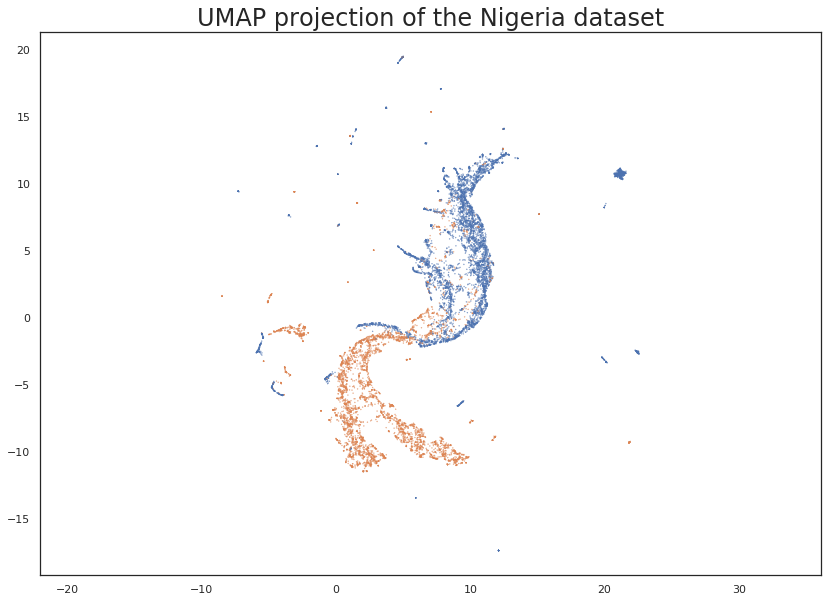

In [28]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in df['Class']], s=.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Nigeria dataset', fontsize=24);

In [26]:
embedding2 = TSNE(n_components=2, verbose=1).fit_transform(dataset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11928 samples in 0.169s...
[t-SNE] Computed neighbors for 11928 samples in 5.968s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11928
[t-SNE] Computed conditional probabilities for sample 2000 / 11928
[t-SNE] Computed conditional probabilities for sample 3000 / 11928
[t-SNE] Computed conditional probabilities for sample 4000 / 11928
[t-SNE] Computed conditional probabilities for sample 5000 / 11928
[t-SNE] Computed conditional probabilities for sample 6000 / 11928
[t-SNE] Computed conditional probabilities for sample 7000 / 11928
[t-SNE] Computed conditional probabilities for sample 8000 / 11928
[t-SNE] Computed conditional probabilities for sample 9000 / 11928
[t-SNE] Computed conditional probabilities for sample 10000 / 11928
[t-SNE] Computed conditional probabilities for sample 11000 / 11928
[t-SNE] Computed conditional probabilities for sample 11928 / 11928
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence

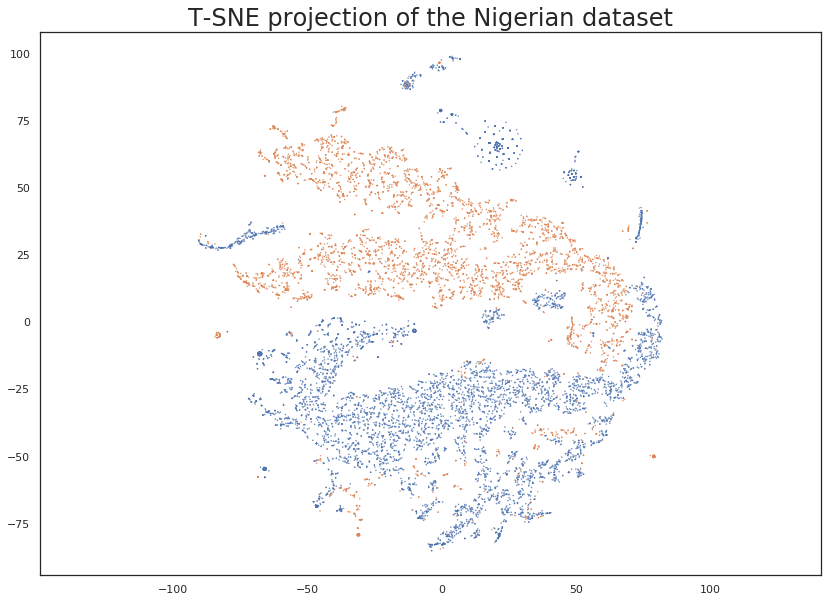

In [27]:
plt.scatter(embedding2[:, 0], embedding2[:, 1], c=[sns.color_palette()[x] for x in df['Class']], s=.2)
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-SNE projection of the Nigerian dataset', fontsize=24);

In [32]:
from sklearn.decomposition import PCA
embedding3 = PCA(n_components=2).fit_transform(dataset)
embedding3.shape

(11928, 2)

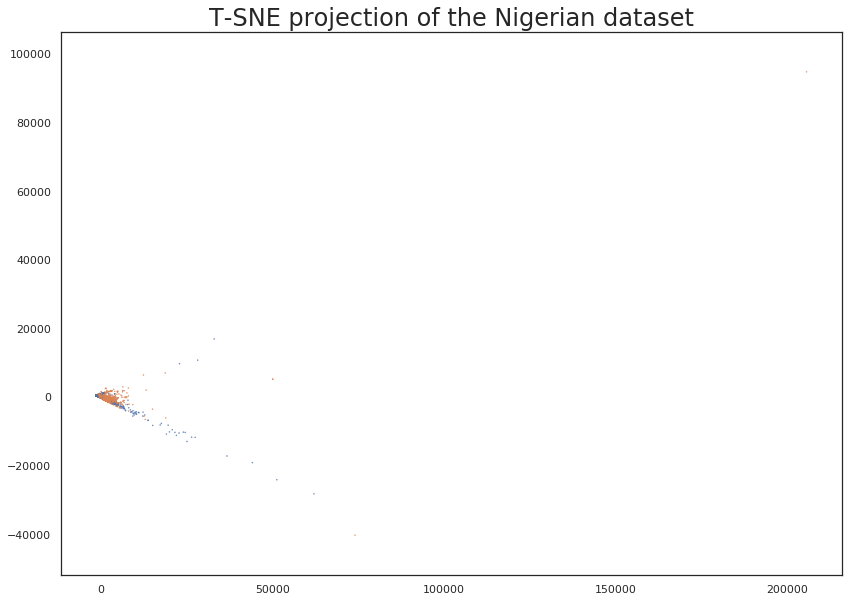

In [33]:
plt.scatter(embedding3[:, 0], embedding3[:, 1], c=[sns.color_palette()[x] for x in df['Class']], s=.2)
plt.gca().set_aspect('equal', 'datalim')
plt.title('T-SNE projection of the Nigerian dataset', fontsize=24);